_____________________________

# Naive Bayes
created by Muhyi :
muhyifathi@gmail.com

___________________________

In [1]:
import numpy as np
import pandas as pd

In [2]:
# import data dari csv
bankloan = pd.read_csv('bankloan.csv')

_______________________

# PEMODELAN

______________________

# Membuat Peubah Dummy

In [3]:
print("peubah awal:\n", list(bankloan),"\n")
bankloan_dummies = pd.get_dummies(bankloan,columns=['ed'])
print("peubah setelah dummy dibuat:\n", list(bankloan_dummies),"\n")

peubah awal:
 ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default'] 

peubah setelah dummy dibuat:
 ['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default', 'ed_1', 'ed_2', 'ed_3', 'ed_4', 'ed_5'] 



In [4]:
# memilih peubah yang akan digunakan dalam pemodelan 
FITUR_DUMMIES=list(bankloan_dummies.columns[0:7])+list(bankloan_dummies.columns[8:13])
y=bankloan['default']
FITUR_DUMMIES

['age',
 'employ',
 'address',
 'income',
 'debtinc',
 'creddebt',
 'othdebt',
 'ed_1',
 'ed_2',
 'ed_3',
 'ed_4',
 'ed_5']

# Membagi Data Train Test

In [5]:
# library untuk membagi data
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import StratifiedKFold

In [6]:
x_trainval, x_test, y_trainval, y_test = train_test_split(bankloan_dummies[FITUR_DUMMIES],
                                                          y,random_state=0,stratify=y) 
x_train, x_val, y_train, y_val = train_test_split(x_trainval,
                                                  y_trainval,random_state=0,
                                                  stratify=y_trainval)

# Pemodelan Awal Naive Bayes

In [7]:
# library untuk naive bayes
from sklearn.naive_bayes import BernoulliNB

In [8]:
# membangun model naive bayes
nvb0 = BernoulliNB()
nvb0.fit(x_trainval,y_trainval)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [9]:
# library untuk menghitung ukuran prediksi
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, confusion_matrix

In [10]:
def eval_nb(nvb):
    print('Evaluasi pada data test \n')
    print("akurasi : \n", 
          accuracy_score(y_test,nvb.predict(x_test)),"\n")
    print("recall : \n", 
          recall_score(y_test,nvb.predict(x_test)),"\n")
    print("precision : \n", 
          precision_score(y_test,nvb.predict(x_test)),"\n")
    print("f1 score : \n", 
          f1_score(y_test,nvb.predict(x_test)),"\n")
    print("confusion_matrix : \n", 
          confusion_matrix(y_test,nvb.predict(x_test)),"\n")
    print("classification_report : \n",
      classification_report(y_test,nvb.predict(x_test)))

In [11]:
eval_nb(nvb0)

Evaluasi pada data test 

akurasi : 
 0.742857142857 

recall : 
 0.239130434783 

precision : 
 0.52380952381 

f1 score : 
 0.328358208955 

confusion_matrix : 
 [[119  10]
 [ 35  11]] 

classification_report : 
              precision    recall  f1-score   support

          0       0.77      0.92      0.84       129
          1       0.52      0.24      0.33        46

avg / total       0.71      0.74      0.71       175



# Memilih parameter tertentu berdasarkan validasi dan validasi silang : alpha

In [12]:
# validasi silang berstrata
skfold = StratifiedKFold(n_splits=5)

# menyediakan tempat untuk beberapa skor prediksi
test_score = []
train_score = []
valid_score = []
cv_score = []

alpha_tune = [0.1,0.2,0.3,0.4,0.5,0.6]

# memilih banyaknya pohon menggunakan looping dengan f1 skor 
for alpha in alpha_tune:
    nvb = BernoulliNB(alpha=alpha)
    nvb.fit(x_train,y_train)
    
    valid_score.append(f1_score(y_val,nvb.predict(x_val)))
    test_score.append(f1_score(y_test,nvb.predict(x_test)))
    train_score.append(f1_score(y_train,nvb.predict(x_train)))
    cv_score.append(cross_val_score(nvb,x_trainval,y_trainval,
                                    scoring="f1",cv=skfold).mean())

In [13]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

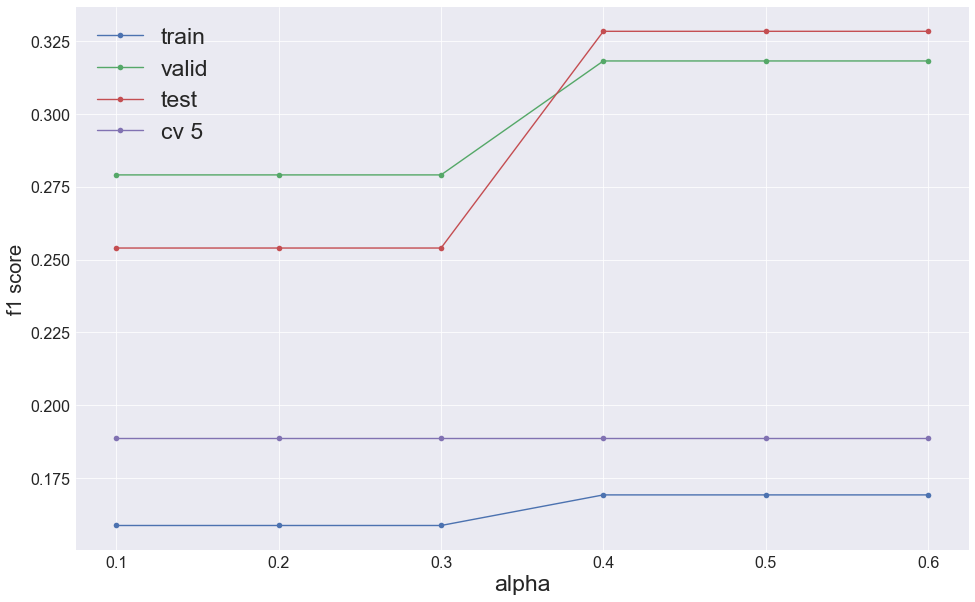

In [14]:
# mengatur ukuran gambar
plt.figure(figsize=(16,10))

# mengubah skala huruf
sns.set_context("paper", font_scale=2)

# menumpuk beberapa grafik dalam satu jendela
plt.plot(alpha_tune,train_score,'o-')
plt.plot(alpha_tune,valid_score,'o-')
plt.plot(alpha_tune,test_score,'o-')
plt.plot(alpha_tune,cv_score,'o-')

# menambahkan keterangan
plt.legend(["train","valid","test","cv 5"],fontsize=23)

# mangatur label pada sumbu x
plt.xlabel("alpha",fontsize=23)

# mangatur label pada sumbu y
plt.ylabel("f1 score",fontsize=20)

plt.show()

# Memilih Parameter Tertentu Menggunakan Fungsi GridSearchCV (Tunning) :

In [15]:
# library
from sklearn.model_selection import GridSearchCV

In [16]:
# daftar parameter yang disiapkan
alpha_tune = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# parmeter yang disiapkan digabung dalam satu objek
param_grid = {
    'alpha':alpha_tune
}

In [17]:
# program untuk tunning menggunakan fungsi GridSearchCV

# inisialisasi model 
nvb = BernoulliNB()

# perintah untuk melakukan validasi silang secara stratified
skf = StratifiedKFold(n_splits=3,random_state=0)

# fungsi GridSearchCV
grid_search_nvb = GridSearchCV(nvb,
                               #parameter grid   
                               param_grid=param_grid,
                               #beberapa ukuran yang ingin dimunculkan
                               scoring=['accuracy','recall','precision','f1'],
                               #ukuran prediksi yang digunakan untuk tunning
                               refit='f1',
                               # metode validasi silang
                               cv=skf)

In [18]:
# melakukan parameter tunning menggunakan data training
grid_search_nvb.fit(x_trainval,y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=False),
       error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring=['accuracy', 'recall', 'precision', 'f1'], verbose=0)

In [19]:
# memunculkan seluruh hasil fitting model
df_tunning = pd.DataFrame(grid_search_nvb.cv_results_)

In [20]:
list(df_tunning)

['mean_fit_time',
 'mean_score_time',
 'mean_test_accuracy',
 'mean_test_f1',
 'mean_test_precision',
 'mean_test_recall',
 'mean_train_accuracy',
 'mean_train_f1',
 'mean_train_precision',
 'mean_train_recall',
 'param_alpha',
 'params',
 'rank_test_accuracy',
 'rank_test_f1',
 'rank_test_precision',
 'rank_test_recall',
 'split0_test_accuracy',
 'split0_test_f1',
 'split0_test_precision',
 'split0_test_recall',
 'split0_train_accuracy',
 'split0_train_f1',
 'split0_train_precision',
 'split0_train_recall',
 'split1_test_accuracy',
 'split1_test_f1',
 'split1_test_precision',
 'split1_test_recall',
 'split1_train_accuracy',
 'split1_train_f1',
 'split1_train_precision',
 'split1_train_recall',
 'split2_test_accuracy',
 'split2_test_f1',
 'split2_test_precision',
 'split2_test_recall',
 'split2_train_accuracy',
 'split2_train_f1',
 'split2_train_precision',
 'split2_train_recall',
 'std_fit_time',
 'std_score_time',
 'std_test_accuracy',
 'std_test_f1',
 'std_test_precision',
 'std_tes

In [21]:
show = ['param_alpha','mean_test_accuracy','mean_test_f1','mean_test_precision','mean_test_recall']
df_tunning[show]

,param_alpha,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
0,0.1,0.739048,0.207251,0.507577,0.131473
1,0.2,0.739048,0.207251,0.507577,0.131473
2,0.3,0.739048,0.207251,0.507577,0.131473
3,0.4,0.739048,0.207251,0.507577,0.131473
4,0.5,0.739048,0.207251,0.507577,0.131473
5,0.6,0.739048,0.207251,0.507577,0.131473
6,0.7,0.739048,0.207251,0.507577,0.131473
7,0.8,0.739048,0.207251,0.507577,0.131473
8,0.9,0.737143,0.206163,0.488952,0.131473
9,1,0.737143,0.206163,0.488952,0.131473


____________________-

# MODEL AKHIR

____________________--

In [22]:
# model akhir berdasarkan fungsi GridSearchCV
nvb_final = BernoulliNB(alpha=0.4)
nvb_final.fit(x_train,y_train)

BernoulliNB(alpha=0.4, binarize=0.0, class_prior=None, fit_prior=True)

In [23]:
# menampilkan beberapa skor pada validasi akhir
print("akurasi \n",accuracy_score(y_test,nvb_final.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,nvb_final.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,nvb_final.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,nvb_final.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,nvb_final.predict(x_test)),"\n")

akurasi 
 0.742857142857 

recall 
 0.239130434783 

precision 
 0.52380952381 

confusion matrix 
 [[119  10]
 [ 35  11]] 

classification report 
              precision    recall  f1-score   support

          0       0.77      0.92      0.84       129
          1       0.52      0.24      0.33        46

avg / total       0.71      0.74      0.71       175
 



_______________

# MENYIMPAN DAN MEMUAT MODEL

_________________________

In [24]:
# library untuk menyimpan dan memuat model
import pickle

In [25]:
#menyimpan model
filename = 'Model Naive Bayes.sav'
pickle.dump(nvb_final,open(filename,'wb'))

In [26]:
# memuat model
loaded_model = pickle.load(open(filename,'rb'))

In [27]:
# menampilkan beberapa skor pada model yang telah dimuat
print("akurasi \n",accuracy_score(y_test,loaded_model.predict(x_test)),"\n")
print("recall \n",recall_score(y_test,loaded_model.predict(x_test)),"\n")
print("precision \n",precision_score(y_test,loaded_model.predict(x_test)),"\n")
print("confusion matrix \n",confusion_matrix(y_test,loaded_model.predict(x_test)),"\n")
print("classification report \n",classification_report(y_test,loaded_model.predict(x_test)),"\n")

akurasi 
 0.742857142857 

recall 
 0.239130434783 

precision 
 0.52380952381 

confusion matrix 
 [[119  10]
 [ 35  11]] 

classification report 
              precision    recall  f1-score   support

          0       0.77      0.92      0.84       129
          1       0.52      0.24      0.33        46

avg / total       0.71      0.74      0.71       175
 

